# Simple Linear Regression

Rafiq Islam  
2024-08-29

# Simple Linear Regression

A simple linear regression in multiple predictors/input
variables/features/independent variables/ explanatory
variables/regressors/ covariates (many names) often takes the form

$$
 y=f(\mathbf{x})+\epsilon =\mathbf{\beta}\mathbf{x}+\epsilon
 $$

where $\mathbf{\beta} \in \mathbb{R}^d$ are regression parameters or
constant values that we aim to estimate and
$\epsilon \sim \mathcal{N}(0,1)$ is a normally distributed error term
independent of $x$ or also called the white noise.

In this case, the model:

$$
y=f(x)+\epsilon=\beta_0+\beta_1 x+\epsilon
$$

Therefore, in our model we need to estimate the parameters
$\beta_0,\beta_1$. The true relationship between the explanatory
variables and the dependent variable is $y=f(x)$. But our model is
$y=f(x)+\epsilon$. Here, this $f(x)$ is the working model with the data.
In other words, $\hat{y}=f(x)=\hat{\beta}_0+\hat{\beta}_1 x$. Therefore,
there should be some error in the model prediction which we are calling
$\epsilon=\|y-\hat{y}\|$ where $y$ is the true value and $\hat{y}$ is
the predicted value. This error term is normally distributed with mean 0
and variance 1. To get the best estimate of the parameters
$\beta_0,\beta_1$ we can minimize the error term as much as possible.
So, we define the residual sum of squares (RSS) as:

Using multivariate calculus we see

Setting the partial derivatives to zero we solve for
$\hat{\beta_0},\hat{\beta_1}$ as follows

and,

Therefore, we have the following

Simple Linear Regression `slr` is applicable for a single feature data
set with contineous response variable.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Assumptions of Linear Regressions

-   **Linearity:** The relationship between the feature set and the
    target variable has to be linear.  
-   **Homoscedasticity:** The variance of the residuals has to be
    constant.  
-   **Independence:** All the observations are independent of each
    other.  
-   **Normality:** The distribution of the dependent variable $y$ has to
    be normal.

## Synthetic Data

To implement the algorithm, we need some synthetic data. To generate the
synthetic data we use the linear equation $y(x)=2x+\frac{1}{2}+\xi$
where $\xi\sim \mathbf{N}(0,1)$

In [2]:
X=np.random.random(100)
y=2*X+0.5+np.random.randn(100)

Note that we used two random number generators, `np.random.random(n)`
and `np.random.randn(n)`. The first one generates $n$ random numbers of
values from the range (0,1) and the second one generates values from the
standard normal distribution with mean 0 and variance or standard
deviation 1.

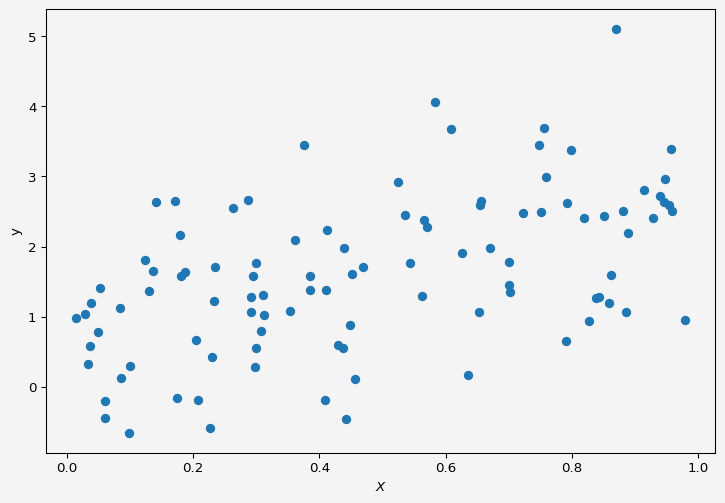

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.xlabel('$X$')
plt.ylabel('y')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## Model

We want to fit a simple linear regression to the above data.

In [4]:
slr=LinearRegression()

Now to fit our data $X$ and $y$ we need to reshape the input variable.
Because if we look at $X$,

In [5]:
X

array([0.95833574, 0.06049647, 0.3000169 , 0.18114067, 0.86123202,
       0.02944925, 0.44222535, 0.43720277, 0.82700928, 0.23274419,
       0.08453413, 0.79210132, 0.56613682, 0.72170021, 0.88840178,
       0.75645526, 0.14192944, 0.58268303, 0.0332896 , 0.18766569,
       0.75953552, 0.29999034, 0.20715149, 0.23427365, 0.88542859,
       0.17084883, 0.7476262 , 0.62571225, 0.9564716 , 0.29175647,
       0.28747506, 0.85122232, 0.86940345, 0.29519548, 0.79049849,
       0.94731486, 0.65654705, 0.79845697, 0.36121765, 0.01519379,
       0.94583885, 0.03680651, 0.37614518, 0.30784481, 0.38577342,
       0.17448313, 0.41258757, 0.06097662, 0.09967883, 0.70145204,
       0.54397749, 0.85866927, 0.65439908, 0.09911485, 0.4686656 ,
       0.17956289, 0.56974828, 0.44890155, 0.8198549 , 0.45212619,
       0.08592819, 0.13690735, 0.05013839, 0.38519583, 0.84331247,
       0.31127446, 0.20496151, 0.52463067, 0.26401877, 0.91457664,
       0.40988059, 0.12402272, 0.22994726, 0.53595863, 0.65267

It is a one-dimensional array/vector but the `slr` object accepts input
variable as matrix or two-dimensional format.

In [6]:
X=X.reshape(-1,1)
X[:10]

array([[0.95833574],
       [0.06049647],
       [0.3000169 ],
       [0.18114067],
       [0.86123202],
       [0.02944925],
       [0.44222535],
       [0.43720277],
       [0.82700928],
       [0.23274419]])

Now we fit the data to our model

In [7]:
slr.fit(X,y)
slr.predict([[2],[3]])

array([4.57314885, 6.51183099])

We have our $X=2,3$ and the corresponding $y$ values are from the above
cell output, which are pretty close to the model $y=2x+\frac{1}{2}$.

In [8]:
intercept = round(slr.intercept_,4)
slope = slr.coef_

Now our model parameters are: intercept $\beta_0=$ 0.6958 and slope
$\beta_1=$ array(\[1.93868214\]).

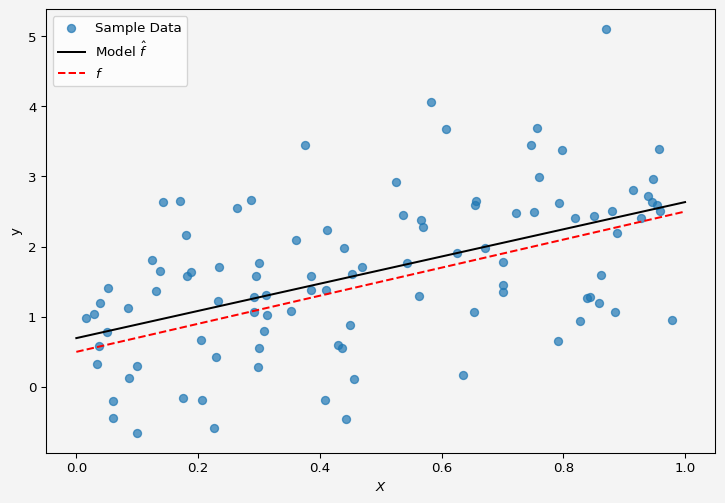

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, alpha=0.7,label="Sample Data")
plt.plot(np.linspace(0,1,100),
    slr.predict(np.linspace(0,1,100).reshape(-1,1)),
    'k',
    label='Model $\hat{f}$'
)
plt.plot(np.linspace(0,1,100),
    2*np.linspace(0,1,100)+0.5,
    'r--',
    label='$f$'
)
plt.xlabel('$X$')
plt.ylabel('y')
plt.legend(fontsize=10)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

So the model fits the data almost perfectly.

Up next [multiple linear
regression](../../dsandml/multiplelinreg/index.qmd).

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**